# Identificar fronteras no lineales

Aqui es donde las SVM muestran todo su potencial

In [15]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [16]:
X,Y = make_circles(100,factor=.1, noise=.1)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC #Support Vector Classifier

In [18]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:#si no existe ningun dibujo creado
        ax = plt.gca()
    xlim = ax.get_xlim()#la anterior xx
    ylim = ax.get_ylim()#la anterior yy
    
    #Generamos parrilla de puntos para evaluar el modelo
    xx= np.linspace(xlim[0], xlim[1],30)
    yy= np.linspace(ylim[0], ylim[1],30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T #La T es para hacer una tupla
    P = model.decision_function(xy).reshape(X.shape)
    
    
    #Representamos las fronteras y margenes de SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors="black")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

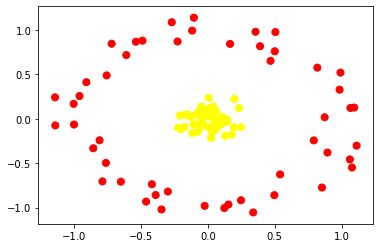

In [19]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

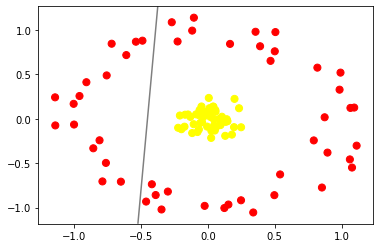

In [20]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [21]:
r = np.exp(-(X**2).sum(1))

In [22]:
r

array([0.99924227, 0.98649602, 0.98663085, 0.98495966, 0.97987732,
       0.35863977, 0.34069589, 0.99294786, 0.28571547, 0.99670644,
       0.94803335, 0.98023896, 0.36921848, 0.3721038 , 0.99284096,
       0.3161257 , 0.98979216, 0.91460223, 0.35310672, 0.99497041,
       0.52564165, 0.97996829, 0.38840595, 0.36392474, 0.98749344,
       0.98048627, 0.23119882, 0.36498774, 0.94753053, 0.44435052,
       0.38185855, 0.47915317, 0.986114  , 0.38429347, 0.41039363,
       0.93161703, 0.94161693, 0.97582985, 0.95397921, 0.94680019,
       0.98862007, 0.93418072, 0.42892346, 0.98794995, 0.98603991,
       0.28615775, 0.99053286, 0.27172789, 0.95568909, 0.26510693,
       0.31224054, 0.99344099, 0.36948178, 0.29717831, 0.99840346,
       0.33833235, 0.9957776 , 0.4124637 , 0.98086754, 0.98131897,
       0.26244226, 0.99417053, 0.39611121, 0.40495609, 0.95384004,
       0.97898518, 0.46628625, 0.96919692, 0.96080114, 0.9619374 ,
       0.99209106, 0.26455807, 0.29965631, 0.44643813, 0.25518

In [23]:
from mpl_toolkits import mplot3d

In [24]:
def plot_3D(elev=30, azim=30, X=X,Y=Y,r=r):
        ax = plt.subplot(projection="3d")
        ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap="autumn")
        ax.view_init(elev=elev,azim=azim)
        
        ax.set_xlabel("x[0]")
        ax.set_ylabel("x[1]")
        ax.set_zlabel("r")

In [25]:
from ipywidgets import interact, fixed

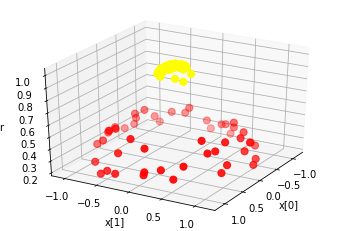

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.84617760e-02,  2.04249351e-02],
       [ 5.88109086e-02, -1.00683977e-01],
       [ 2.14981764e-02,  1.14005039e-01],
       [-1.06520825e-01, -6.17082683e-02],
       [ 5.14791519e-02, -1.32957871e-01],
       [ 1.22950229e-01, -1.00514678e+00],
       [ 9.84967455e-01,  3.26502874e-01],
       [ 8.40503244e-02, -3.55934200e-03],
       [ 9.91943617e-01,  5.18465693e-01],
       [-4.40007149e-02, -3.69179764e-02],
       [-1.98451854e-01, -1.18247466e-01],
       [ 1.41143509e-01, -6.11640356e-03],
       [-1.17753522e-01,  9.91211803e-01],
       [-9.60935042e-01,  2.55316030e-01],
       [ 4.76027567e-02, -7.01339311e-02],
       [ 1.06626430e+00,  1.21226247e-01],
       [-8.86061899e-02,  4.90840405e-02],
       [ 1.98876571e-01,  2.22966680e-01],
       [-5.38931348e-01,  8.66335938e-01],
       [-2.41889965e-02,  6.67621018e-02],
       [ 4.68598698e-01,  6.50807824e-01],
       [ 4.11067092e-02,  1.36181154e-01],
       

In [26]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], azim=[-180,-150,-120,90,-60,-30,0,30,60,90,120,150,160,180], X= fixed(X), Y= fixed(Y), r= fixed(r))#creo slider 
#esa N la tuve que cambiar manualmente de -90 o 200 para ver como cambia el grafico y aun se conservan los
#mismos puntos de soporte

### Radial bassis function

In [30]:
rbf = SVC(kernel="rbf", C=1E6, gamma="auto")
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

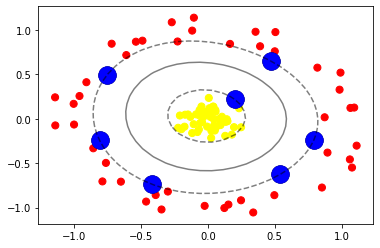

In [37]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn") #dibujo todos los puntos
plt_svc(rbf)#incorporo lineas radiales
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")#muestro los support vectors

Consulta los diferentes tipos de SVC:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html